In [1]:
import pandas as pd
import bson

##### Entities

In [2]:
with open('entities.bson','rb') as f:
    ent_data = bson.decode_all(f.read())

In [3]:
print (len(ent_data))
ent_data[0]['affiliation']

95941


'NonCore'

In [4]:
enron_employee_jt_map = {}
i = 0
for entry in ent_data:
    try:
        handle = entry['email_address'].split('@')[0].split('.')
        # First.Last
        if len(handle) == 2:
            last = handle[1]
            first = handle[0]            
        # Middle.First.Last
        elif len(handle) == 3:
            last = handle[2]
            first = handle[1]
            
        job_title_name_format = last + '-' + first[0]
        enron_employee_jt_map[entry['uid']] = job_title_name_format.lower()
    except:
        i += 1
print (i)
print (len(enron_employee_jt_map.keys()))

# Converge eliminating duplicates
temp_ = {v:k for k,v in enron_employee_jt_map.items()}
enron_employee_jt_map = {v:k for k,v in temp_.items()}

print (len(enron_employee_jt_map.keys()))

74633
21308
18091


In [5]:
# Parse Job Titles Dataset
jt_dict = {}
with open('enron_data.html', 'r') as file_:
    for line in file_.readlines():
        if line != '':
            # ID UID FName LName Rank
            details = line.split()
            uid = details[1]
            rank = ' '.join(details[4:])
            jt_dict[uid] = rank

In [6]:
enron_employees_known_jts = {}
for employee in enron_employee_jt_map:
    try:
        enron_employees_known_jts[employee] = jt_dict[enron_employee_jt_map[employee].lower()]
    except:
        None

In [7]:
for emp in enron_employees_known_jts:
    print (enron_employee_jt_map[emp] + " " + enron_employees_known_jts[emp])

sanders-r Vice President Enron WholeSale Services
shapiro-r Vice President Regulatory Affairs
hayslett-r Vice President Also Chief Financial Officer and Treasurer
slinger-r Trader
horton-s President Enron Gas Pipeline
beck-s Employee Chief Operating Officer
brawner-s Director
shackleton-s N/A
harris-s N/A
neal-s Vice President
white-s N/A
corman-s Vice President Regulatory Affairs
scott-s N/A
bailey-s N/A
panus-s Employee
merriss-s N/A Specialist
pereira-s Employee
jones-t N/A
martin-t Vice President
kaminski-v Manager Risk Management Head
gay-r N/A
sturm-f Vice President
forney-j Manager Real time Trading Desk
lokey-t Manager Regulatory Affairs
solberg-g Employee
storey-g Director
nemec-g N/A
guzman-m Trader
buy-r Manager Chief Risk Management Officer
swerzbin-m Trader
shively-h Vice President
derrick-j In House Lawyer
lavorato-j CEO Enron America
shankman-j President Enron Global Mkts
skilling-j CEO
williams-j N/A Trading
griffith-j Managing Director MD of UK
tholt-j Vice President
s

enron_employees_known_jts
[employee_uid] [last-fi]

enron_employees_known_jts
[employee_uid] [job title]

In [8]:
enron_employee_uid_set = set([])
i = 0
for entry in ent_data:
    try:
        if entry['affiliation'] != 'NonEnron':
            enron_employee_uid_set.add(entry['uid'])
    except:
        i += 1
print (i)
print (len(enron_employee_uid_set))

51430
9501


##### Emails

In [9]:
with open('emails.bson','rb') as f:
    email_data = bson.decode_all(f.read())

In [10]:
print (len(email_data))
email_data[0].keys()

276279


dict_keys(['_id', '_cls', '_types', 'annotations', 'body', 'cc', 'corresponding_files', 'from', 'header_info', 'is_bubble', 'message_type', 'recipients', 'subject', 'text_chunks', 'to', 'uid'])

In [23]:
email_data_subset = set([])
enron_employee_emails_set = set([])
i = 0
for email in email_data:
    try:
        if email['from'] in enron_employee_uid_set:
            for to_id in email['to']:
                if to_id in enron_employee_uid_set:
                    enron_employee_emails_set.add(email['uid'])
                    #email_data_subset.add([email['to'], email['from'], email['body']])
                    break
    except:
        i += 1
print (i)
print (len(enron_employee_emails_set))

44820
34233


In [24]:
#with open('threads.bson','rb') as f:
#    thread_data = bson.decode_all(f.read())

In [25]:
#thread_data[4]

In [26]:
# CEO = 0
# C-Suite = 0
c_count = 0
# President = 1
p_count = 0
# VP = 2
vp_count = 0
# Director = 3
d_count = 0
# IHL = 4
ihl_count = 0
# Manager = 5
m_count = 0
# Trader / Specialist = 6
ts_count = 0
# Employee / NA = 7
e_count = 0

# UID -> Rank
employee_rank = {}

for rank in jt_dict.keys():
    raw_rank = jt_dict[rank]
    if raw_rank.find('CEO') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 0
        c_count += 1
    elif raw_rank.find('Chief') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 0
        c_count += 1
    elif raw_rank.find('Vice') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 2
        vp_count += 1
    elif raw_rank.find('President') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 1
        p_count += 1
    elif raw_rank.find('Director') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 3
        d_count += 1
    elif raw_rank.find('Lawyer') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 4
        ihl_count += 1
    elif raw_rank.find('Manager') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 5
        m_count += 1
    elif raw_rank.find('Trader') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 6
        ts_count += 1
    elif raw_rank.find('Specialist') != -1:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 6
        ts_count += 1
    else:
        #print (jt_dict[rank])
        #print (rank)
        employee_rank[rank] = 7
        e_count += 1        

In [27]:
print ('C Level: ' + str(c_count))
print ('Presidents: ' + str(p_count))
print ('VPs: ' + str(vp_count))
print ('Directors: ' + str(d_count))
print ('In-House Lawyers: ' + str(ihl_count))
print ('Managers: ' + str(m_count))
print ('T/Ss: ' + str(ts_count))
print ('Es: ' + str(e_count))

C Level: 8
Presidents: 4
VPs: 17
Directors: 16
In-House Lawyers: 3
Managers: 9
T/Ss: 16
Es: 75


In [41]:
scrap_email_uids = set([])
for email in email_data:
    if email['uid'] in enron_employee_emails_set:
        if email['body'].find("TR Daily") != -1:
            scrap_email_uids.add(email['uid'])

In [52]:
len(scrap_email_uids)

14

In [146]:
i = 0
from collections import defaultdict

#[(from_, to_)] = concat(subject + body) 
relationship_content = defaultdict(str)
conversation_count = defaultdict(int)

senders_set = set([])
receivers_set = set([])

senders_count = defaultdict(int)
receivers_count = defaultdict(int)

for email in email_data:
    to_, from_, subject_, body_ = "", "", "", ""
    if email['uid'] in enron_employee_emails_set and email['uid'] not in scrap_email_uids:
        # Extract 'to', 'from' addresses, exlucude mass e-mails
        to_ = email['to']
        if len(to_) > 3:
            next
            
        from_ = email['from']
        # Extract subject/body
        content_bool = False
        try:
            subject_ = email['subject']
            content_bool = True
        except:
            pass
        
        try:
            body_ = email['body']
            content_bool = True
        except:
            pass
        
        if not content_bool:
            next
            
        for address in to_:
            if address != from_ and from_ in enron_employees_known_jts and address in enron_employees_known_jts:
                senders_set.add(from_)
                senders_count[from_] += 1
                
                receivers_set.add(address)
                receivers_count[address] += 1
                
                relationship_content[((from_, address))] += subject_ + " " + body_
                conversation_count[((from_, address))] += 1
        
        ## For Testing 
        #i +=1
        #if i > 10: break
        
        # Create relationship (of not already)
        
        # add body to existing
#print (email_data[2]['body'])      

In [147]:
total_length = len(relationship_content.keys())
total_count = 0
convos_count = 0

for c_ in conversation_count:
    convos_count += conversation_count[c_]

for rc in relationship_content:
    total_count += len(relationship_content[rc])
    
print ("Total relationships: " + str(total_length))
print ("Avg char. count of content: " + str(total_count / total_length))

print ("\nTotal e-mails sent: " + str(convos_count))
print ("Avg convo. count per relationship: " + str(convos_count / total_length))

print ("\nTotal senders: " + str(len(senders_set)))
print ("Total receivers: " + str(len(receivers_set)))

Total relationships: 55
Avg char. count of content: 9211.09090909091

Total e-mails sent: 427
Avg convo. count per relationship: 7.763636363636364

Total senders: 10
Total receivers: 38


In [ ]:
print ("\nTop senders: ")
for sender in sorted(senders_count, key=senders_count.get, reverse=True)[:5]:
    print ("\n\tTitle: " + str(enron_employees_known_jts[sender]))
    print ("\tName: " + str(enron_employee_jt_map[sender]))
    print ("\t# Sent: " + str(senders_count[sender]))
    print ("\t# Received: " + str(receivers_count[sender]))
    
print ("\nTop receivers: ")
for receiver in sorted(receivers_count, key=receivers_count.get, reverse=True)[:5]:
    print ("\n\tTitle: " + str(enron_employees_known_jts[receiver]))
    print ("\tName: " + str(enron_employee_jt_map[receiver]))
    print ("\t# Sent: " + str(senders_count[sender]))
    print ("\t# Received: " + str(receivers_count[receiver]))
#newA = 
#newA

In [173]:
[senders_count[sender] for sender in sorted(senders_count, key=senders_count.get, reverse=True)[:5]]


[144, 118, 72, 27, 25]

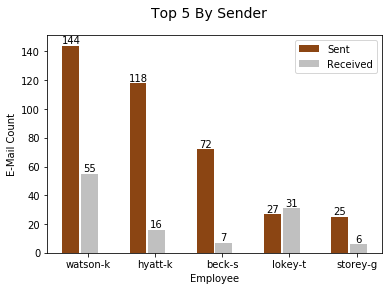

In [210]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure()
fig.suptitle('Top 5 By Sender', fontsize=14)
ax = fig.add_subplot(111)

yvals = [senders_count[sender] for sender in sorted(senders_count, key=senders_count.get, reverse=True)[:5]]
sent_ = ax.bar(ind, yvals, width, color='saddlebrown')
zvals = [receivers_count[receiver] for receiver in sorted(senders_count, key=senders_count.get, reverse=True)[:5]]
recvd_ = ax.bar(ind+width*1.1, zvals, width, color='silver')

ax.set_ylabel('E-Mail Count')
ax.set_xlabel('Employee')
ax.set_xticks(ind+width)
ax.set_xticklabels( array([enron_employee_jt_map[sender] for sender in sorted(senders_count, key=senders_count.get, reverse=True)[:5]])
)
ax.legend( ("Sent", "Received", ('y', 'z') ))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(sent_)
autolabel(recvd_)

plt.show()

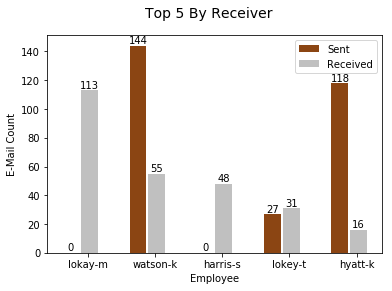

In [211]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure()
fig.suptitle('Top 5 By Receiver', fontsize=14)
ax = fig.add_subplot(111)

yvals = [senders_count[sender] for sender in sorted(receivers_count, key=receivers_count.get, reverse=True)[:5]]
sent_ = ax.bar(ind, yvals, width, color='saddlebrown')
zvals = [receivers_count[receiver] for receiver in sorted(receivers_count, key=receivers_count.get, reverse=True)[:5]]
recvd_ = ax.bar(ind+width*1.1, zvals, width, color='silver')

ax.set_ylabel('E-Mail Count')
ax.set_xlabel('Employee')
ax.set_xticks(ind+width)
ax.set_xticklabels( array([enron_employee_jt_map[receiver] for receiver in sorted(receivers_count, key=receivers_count.get, reverse=True)[:5]])
)
ax.legend( ("Sent", "Received", ('y', 'z') ))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(sent_)
autolabel(recvd_)

plt.show()

In [ ]:
# Convert to label -> text
pre_prep_format = []
u_count = 0
nu_count = 0

for key in relationship_content.keys():
    from_, to_ = key
    print (from_)

In [247]:
# Convert to label -> text
pre_prep_format = []
u_count = 0
nu_count = 0
n_count = 0
for key in relationship_content.keys():
    from_, to_ = key
    f_rank = employee_rank[enron_employee_jt_map[from_]]
    t_rank = employee_rank[enron_employee_jt_map[to_]]
    
    if f_rank < t_rank:
        pre_prep_format.append(('upward', relationship_content[key]))
        u_count += 1
    elif f_rank > t_rank:
        nu_count += 1
        pre_prep_format.append(('not-upward', relationship_content[key]))
    #else:
    #    n_count += 1
    #    pre_prep_format.append(('neutral', relationship_content[key]))

In [248]:
print ("Total messages: " + str(len(pre_prep_format)))
print ("Upward messages: " + str(u_count))
print ("Not-upward messages: " + str(nu_count))
print ("Neutral messages: " + str(n_count))

Total messages: 44
Upward messages: 37
Not-upward messages: 7
Neutral messages: 0


In [249]:
import re
import nltk
import string
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [251]:
stop = set(stopwords.words('english'))

post_prep_format = []

for label, message in pre_prep_format:
    processed_message = message.lower()
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(processed_message)
    
    filtered_words = filter(lambda token: token not in stopwords.words('english'), tokens)
    
    # Return
    post_prep_format.append((label, ' '.join(filtered_words)))

In [252]:
#print (pre_prep_format[50])

In [253]:
#print (post_prep_format[50])

In [254]:
df = pd.DataFrame(post_prep_format, columns=['label', 'message'])

In [255]:
df_train = df[:round(df.shape[0] *.7)]
df_test = df[round(df.shape[0] *.7):]

In [256]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

tfidf_transformer = TfidfTransformer()
baseline_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
])

In [257]:
baseline_clf.fit(df_train['message'], df_train['label'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [258]:
predicted = baseline_clf.predict(df_test['message'])
print ("Initial baseline accuracy: " + str(np.mean(predicted == df_test['label'])))

Initial baseline accuracy: 0.8461538461538461


In [259]:
predicted

array(['upward', 'upward', 'upward', 'upward', 'upward', 'upward',
       'upward', 'upward', 'upward', 'upward', 'upward', 'upward',
       'upward'], dtype='<U10')

In [260]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [261]:
model = Sequential()

In [262]:
df_train['message'].shape

(31,)

In [263]:
word_count = set([])

for message in df_train['message']:
    word_count.add(message)

In [264]:
len(word_count)

25

In [265]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

In [266]:
num_labels = 2
vocab_size = 15000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['message'])
 
x_train = tokenizer.texts_to_matrix(df_train['message'], mode='tfidf')
x_test = tokenizer.texts_to_matrix(df_test['message'], mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(df_train['label'])
y_train = encoder.transform(df_train['label'])
y_test = encoder.transform(df_test['label'])

In [267]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1026      
__________